In [6]:
%matplotlib inline

# install mongo client
!pip install pymongo

import pandas as pd
from pymongo import MongoClient

## What is a trend of number of terrorism related articles throughout years?

In [7]:
# connect to mongo collection
client = MongoClient()
db = client['data-science-capstone']
articles_collection = db.articles

In [8]:
# create dataframe from articles collection
terrorist_articles = articles_collection.find({'query': 'terrorist'})
terrorist_df = pd.DataFrame(list(terrorist_articles))
terrorist_df.head()

,_id,apiUrl,fields,id,isHosted,query,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl
0,593bd7c940420aeb51a6ad2a,https://content.guardianapis.com/news/2017/mar...,{'body': '<p>At around 8pm on Sunday 29 Januar...,news/2017/mar/30/myth-lone-wolf-terrorist,False,terrorist,news,News,article,2017-03-30T07:23:43Z,The myth of the ‘lone wolf’ terrorist,https://www.theguardian.com/news/2017/mar/30/m...
1,593bd7c940420aeb51a6ad2c,https://content.guardianapis.com/world/2017/ju...,{'body': '<h2>Top story: Only one of London at...,world/2017/jun/07/wednesday-briefing-i-am-goin...,False,terrorist,world,World news,article,2017-06-07T05:02:56Z,Wednesday briefing: ‘I am going to be a terror...,https://www.theguardian.com/world/2017/jun/07/...
2,593bd7c940420aeb51a6ad2e,https://content.guardianapis.com/world/2017/ju...,{'body': '<p>A rock festival in Germany has be...,world/2017/jun/02/rock-am-ring-festival-in-ger...,False,terrorist,world,World news,article,2017-06-02T20:36:36Z,Rock am Ring festival in Germany evacuated ove...,https://www.theguardian.com/world/2017/jun/02/...
3,593bd7c940420aeb51a6ad30,https://content.guardianapis.com/uk-news/2017/...,"{'body': '<p>Shortly before 11am on Saturday, ...",uk-news/2017/may/28/race-to-find-manchester-te...,False,terrorist,uk-news,UK news,article,2017-05-28T06:00:02Z,The race to find the Manchester terrorist network,https://www.theguardian.com/uk-news/2017/may/2...
4,593bd7c940420aeb51a6ad32,https://content.guardianapis.com/teacher-netwo...,"{'body': '<p>The <a draggable=""true"" href=""htt...",teacher-network/2017/may/26/talking-about-terr...,False,terrorist,teacher-network,Teacher Network,article,2017-05-26T06:00:04Z,Talking about terrorist attacks with young peo...,https://www.theguardian.com/teacher-network/20...


In [9]:
# add column with datetime format converted from timestamp
terrorist_df['date'] = pd.to_datetime(terrorist_df['webPublicationDate'])

In [20]:
# sort years by number of articles
terrorist_df['year'] = terrorist_df.date.dt.year.astype(str)
year_groups = terrorist_df.groupby('year')
year_counts = year_groups.count().reset_index()
year_counts

,year,_id,apiUrl,fields,id,isHosted,query,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,date,year-month
0,1948,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1949,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1973,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1974,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,1975,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,1976,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,1977,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1981,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,1982,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,1984,6,6,6,6,6,6,6,6,6,6,6,6,6,6


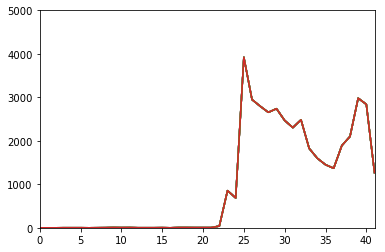

In [45]:
# plot number of articles per year
year_counts.plot(legend=False, ylim=(0,5000))

In [35]:
# get all articles before and after (and including) 2001
before_2001 = year_counts[year_counts['year'] < '2001']
after_2001 = year_counts[year_counts['year'] >= '2001']

# get sums
before_2001_sum = before_2001['id'].sum()
after_2001_sum = after_2001['id'].sum()

# get portions
total = before_2001_sum + after_2001_sum
before_portion = (before_2001_sum / total) * 100
after_portion = (after_2001_sum / total) * 100

print("""Out of {0} articles available between years 1945 and 2017,
{1}% were published before 2001 and {2}% were published in 2001 or later"""
      .format(total, before_portion, after_portion))

Out of 41283 articles available between years 1945 and 2017,
3.982268730470169% were published before 2001 and 96.01773126952983% were published in 2001 or later


Unsurprisingly there's a huge spike in number of articles in year 2001 and all the following years. In fact, 96% of articles available from the Guardian API were published in 2001 or later.

### Let's look what was the month with the most published articles?

In [37]:
# group by year-month
terrorist_df['year-month'] = terrorist_df.date.dt.year.astype(str) + '-' + terrorist_df.date.dt.month.astype(str)
grouped = terrorist_df.groupby('year-month')
group_counts = grouped.count().reset_index()
group_counts

,year-month,_id,apiUrl,fields,id,isHosted,query,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,date,year
0,1948-5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1949-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1973-9,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1974-5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1974-6,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1975-11,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1975-9,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1976-10,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1976-7,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1977-5,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [40]:
group_counts.sort_values(by='id', ascending=False)

,year-month,_id,apiUrl,fields,id,isHosted,query,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,date,year
77,2001-10,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178
87,2001-9,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
133,2005-7,660,660,660,660,660,660,660,660,660,660,660,660,660,660
246,2015-11,611,611,611,611,611,611,611,611,611,611,611,611,611,611
78,2001-11,599,599,599,599,599,599,599,599,599,599,599,599,599,599
79,2001-12,419,419,419,419,419,419,419,419,419,419,419,419,419,419
117,2004-3,397,397,397,397,397,397,397,397,397,397,397,397,397,397
247,2015-12,378,378,378,378,378,378,378,378,378,378,378,378,378,378
261,2016-3,366,366,366,366,366,366,366,366,366,366,366,366,366,366
88,2002-1,346,346,346,346,346,346,346,346,346,346,346,346,346,346


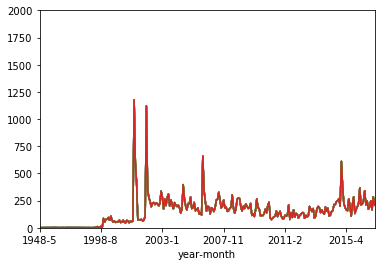

In [46]:
# plot number of articles per month
grouped.count().plot(legend=False, ylim=(0,2000))

Again unsuprisingly, the October 2001 is a month with the most published articles.

## Let's compare see whether we should use all received articles?

In [47]:
# see total number of articles for each section
terrorist_df.groupby(by='sectionId').count().reset_index().sort_values(by='_id', ascending=False)

,sectionId,_id,apiUrl,fields,id,isHosted,query,sectionName,type,webPublicationDate,webTitle,webUrl,date,year,year-month
62,world,12944,12944,12944,12944,12944,12944,12944,12944,12944,12944,12944,12944,12944,12944
56,uk-news,5711,5711,5711,5711,5711,5711,5711,5711,5711,5711,5711,5711,5711,5711
7,commentisfree,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282
40,politics,3515,3515,3515,3515,3515,3515,3515,3515,3515,3515,3515,3515,3515,3515
57,us-news,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
3,business,1805,1805,1805,1805,1805,1805,1805,1805,1805,1805,1805,1805,1805,1805
33,media,1583,1583,1583,1583,1583,1583,1583,1583,1583,1583,1583,1583,1583,1583
2,books,998,998,998,998,998,998,998,998,998,998,998,998,998,998
15,film,883,883,883,883,883,883,883,883,883,883,883,883,883,883
47,sport,595,595,595,595,595,595,595,595,595,595,595,595,595,595


In [55]:
# let's see some of the article titles
print('World:',terrorist_df[terrorist_df['sectionId'] == 'world']['webTitle'].head(10))
print('UK News:',terrorist_df[terrorist_df['sectionId'] == 'uk-news']['webTitle'].head(10))
print('US News:',terrorist_df[terrorist_df['sectionId'] == 'us-news']['webTitle'].head(10))
print('Travel:',terrorist_df[terrorist_df['sectionId'] == 'travel']['webTitle'].head(10))
print('Commentisfree:',terrorist_df[terrorist_df['sectionId'] == 'commentisfree']['webTitle'].head(10))
print('Business:',terrorist_df[terrorist_df['sectionId'] == 'business']['webTitle'].head(10))
print('Law:',terrorist_df[terrorist_df['sectionId'] == 'law']['webTitle'].head(10))
print('Society:',terrorist_df[terrorist_df['sectionId'] == 'society']['webTitle'].head(10))
print('Politics:',terrorist_df[terrorist_df['sectionId'] == 'politics']['webTitle'].head(10))
print('Media:',terrorist_df[terrorist_df['sectionId'] == 'media']['webTitle'].head(10))
print('Technology:',terrorist_df[terrorist_df['sectionId'] == 'technology']['webTitle'].head(10))

World: 1     Wednesday briefing: ‘I am going to be a terror...
2     Rock am Ring festival in Germany evacuated ove...
6     Stockholm attack suspect Rakhmat Akilov admits...
20    Sunday briefing: terrorists strike at heart of...
25    Police investigate deadly Berlin truck crash a...
32      Will the air travel laptop ban stop terrorists?
39    Tuesday briefing: Net must tighten to catch te...
47    Québec City mosque shooting: six dead as Trude...
62    Terrorist attacks and security lapses fuel fea...
63    Dead or alive? Why the world’s most-wanted ter...
Name: webTitle, dtype: object
UK News: 3     The race to find the Manchester terrorist network
5     Bomber's father fought against Gaddafi regime ...
7     Police unravel multiple aliases of Westminster...
9     Royal Marine pleads guilty to preparing for te...
14    Sara Zelenak confirmed as second Australian ki...
16    Met police use 'run, hide, tell' warning for f...
17    'It was a rampage': witnesses describe horror ...
22

Since we're only intersted in articles reporting about attacks themselves, seems like the most appropriate sections to use for our further analysis will be 'World', 'UK News' and 'US News.'

In [ ]:
# Try getting first occurance of a word


In [ ]:
# try finding out first occurance of few words